Dataset Shape: (150000, 21)

Columns: ['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Reason for cancelling by Customer', 'Cancelled Rides by Driver', 'Driver Cancellation Reason', 'Incomplete Rides', 'Incomplete Rides Reason', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method']

Data Types:
 Date                                  object
Time                                  object
Booking ID                            object
Booking Status                        object
Customer ID                           object
Vehicle Type                          object
Pickup Location                       object
Drop Location                         object
Avg VTAT                             float64
Avg CTAT                             float64
Cancelled Rides by Customer          float64
Reason for cancelling by Customer     object
Cance

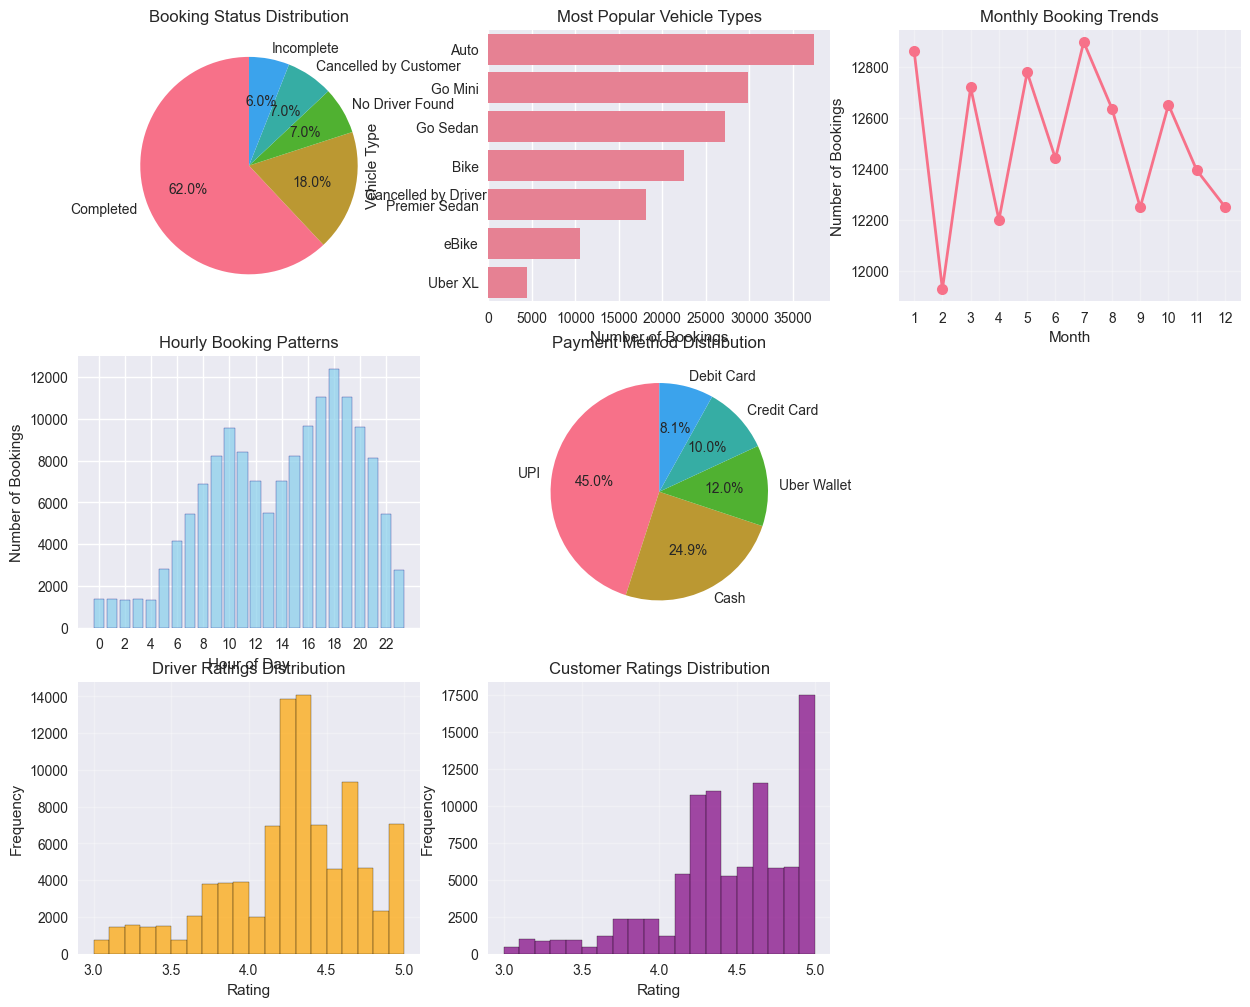

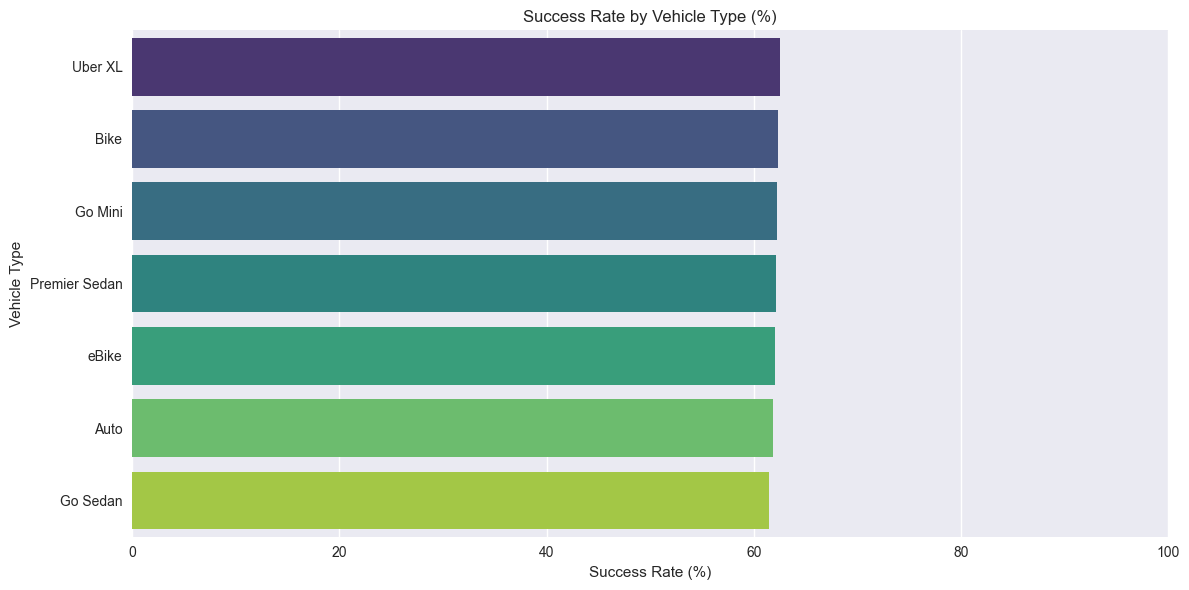

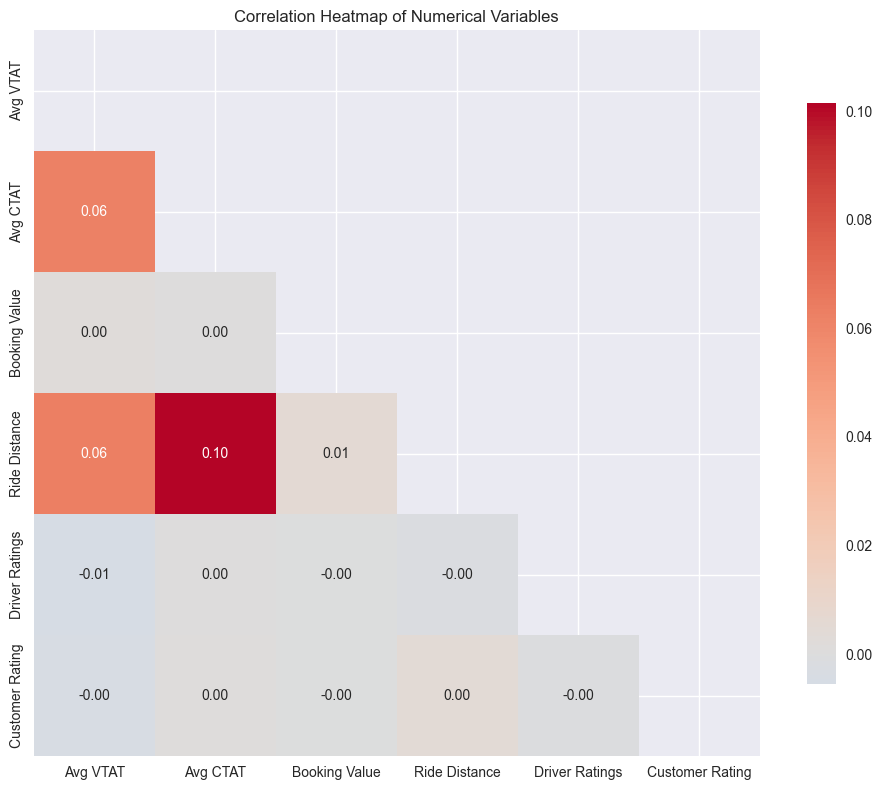


KEY INSIGHTS AND CONCLUSIONS

1. Overall Success Rate: 62.00%
   Total Bookings: 150,000
   Completed Rides: 93,000

2. Cancellation Breakdown:
   ✅ Completed: 93000 (62.00%)
   ❌ Cancelled by Driver: 27000 (18.00%)
   ❌ Cancelled by Customer: 10500 (7.00%)
   🚫 No Driver Found: 10500 (7.00%)
   ⚠️  Incomplete Rides: 9000 (6.00%)

3. Top Driver Cancellation Reasons:
   - Customer related issue: 6837 (25.3%)
   - The customer was coughing/sick: 6751 (25.0%)
   - Personal & Car related issues: 6726 (24.9%)

4. Revenue Analysis:
   💰 Average Booking Value: ₹508.18
   📏 Average Ride Distance: 26.00 km
   💵 Total Revenue (from sample): ₹47,260,574.00

5. Rating Analysis:
   ⭐ Average Driver Rating: 4.23/5
   ⭐ Average Customer Rating: 4.40/5

6. Peak Booking Hour: 18:00 (12397 bookings)

7. Most Popular Vehicle Type: Auto
   Top 3 Vehicle Types:
   1. Auto: 37419 bookings (24.9%)
   2. Go Mini: 29806 bookings (19.9%)
   3. Go Sedan: 27141 bookings (18.1%)

8. Payment Method Preference:
   

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('ncr_ride_bookings.csv')

# Basic data exploration
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Data preprocessing with proper datetime formatting
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df['Month'] = df['Date'].dt.month
df['Hour'] = pd.to_datetime(df['Time'].astype(str), format='%H:%M:%S').dt.hour

# Convert string columns to proper format
string_columns = ['Booking ID', 'Customer ID', 'Pickup Location', 'Drop Location']
for col in string_columns:
    if col in df.columns:
        df[col] = df[col].str.replace('"', '')

# 1. Booking Status Distribution
plt.figure(figsize=(15, 12))
plt.subplot(3, 3, 1)
status_counts = df['Booking Status'].value_counts()
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Booking Status Distribution')

# 2. Vehicle Type Popularity
plt.subplot(3, 3, 2)
vehicle_counts = df['Vehicle Type'].value_counts().head(8)
sns.barplot(x=vehicle_counts.values, y=vehicle_counts.index)
plt.title('Most Popular Vehicle Types')
plt.xlabel('Number of Bookings')

# 3. Monthly Booking Trends
plt.subplot(3, 3, 3)
monthly_bookings = df.groupby('Month').size()
plt.plot(monthly_bookings.index, monthly_bookings.values, marker='o', linewidth=2, markersize=8)
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)

# 4. Hourly Booking Patterns
plt.subplot(3, 3, 4)
hourly_bookings = df.groupby('Hour').size()
plt.bar(hourly_bookings.index, hourly_bookings.values, color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('Hourly Booking Patterns')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bookings')
plt.xticks(range(0, 24, 2))

# 5. Payment Method Distribution
plt.subplot(3, 3, 5)
payment_counts = df['Payment Method'].value_counts()
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Distribution')

# 7. Driver Ratings Distribution
plt.subplot(3, 3, 7)
driver_ratings = df[df['Driver Ratings'].notnull()]['Driver Ratings']
if not driver_ratings.empty:
    plt.hist(driver_ratings, bins=20, edgecolor='black', alpha=0.7, color='orange')
    plt.title('Driver Ratings Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

# 8. Customer Ratings Distribution
plt.subplot(3, 3, 8)
customer_ratings = df[df['Customer Rating'].notnull()]['Customer Rating']
if not customer_ratings.empty:
    plt.hist(customer_ratings, bins=20, edgecolor='black', alpha=0.7, color='purple')
    plt.title('Customer Ratings Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

# Additional Analysis: Success Rate by Vehicle Type
plt.figure(figsize=(12, 6))
vehicle_success = df.groupby('Vehicle Type')['Booking Status'].apply(
    lambda x: (x == 'Completed').sum() / len(x) * 100
).sort_values(ascending=False)

# Filter for vehicle types with sufficient data
vehicle_success = vehicle_success[vehicle_success.index.isin(df['Vehicle Type'].value_counts().head(10).index)]

sns.barplot(x=vehicle_success.values, y=vehicle_success.index, palette='viridis')
plt.title('Success Rate by Vehicle Type (%)')
plt.xlabel('Success Rate (%)')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

# Correlation Heatmap for numerical columns
plt.figure(figsize=(10, 8))
numerical_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
numerical_df = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Drop columns with all NaN values
numerical_df = numerical_df.dropna(axis=1, how='all')

if not numerical_df.empty and len(numerical_df.columns) > 1:
    correlation_matrix = numerical_df.corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, mask=mask, 
                square=True, fmt='.2f', cbar_kws={"shrink": .8})
    plt.title('Correlation Heatmap of Numerical Variables')
    plt.tight_layout()
    plt.show()

# Statistical Summary with proper error handling
print("\n" + "="*50)
print("KEY INSIGHTS AND CONCLUSIONS")
print("="*50)

# 1. Booking Performance
total_bookings = len(df)
completed_bookings = len(df[df['Booking Status'] == 'Completed'])
success_rate = (completed_bookings / total_bookings) * 100
print(f"\n1. Overall Success Rate: {success_rate:.2f}%")
print(f"   Total Bookings: {total_bookings:,}")
print(f"   Completed Rides: {completed_bookings:,}")

# 2. Cancellation Analysis
cancelled_by_driver = len(df[df['Booking Status'] == 'Cancelled by Driver'])
cancelled_by_customer = len(df[df['Booking Status'] == 'Cancelled by Customer'])
no_driver_found = len(df[df['Booking Status'] == 'No Driver Found'])
incomplete_rides = len(df[df['Booking Status'] == 'Incomplete'])

print(f"\n2. Cancellation Breakdown:")
print(f"   ✅ Completed: {completed_bookings} ({(completed_bookings/total_bookings)*100:.2f}%)")
print(f"   ❌ Cancelled by Driver: {cancelled_by_driver} ({(cancelled_by_driver/total_bookings)*100:.2f}%)")
print(f"   ❌ Cancelled by Customer: {cancelled_by_customer} ({(cancelled_by_customer/total_bookings)*100:.2f}%)")
print(f"   🚫 No Driver Found: {no_driver_found} ({(no_driver_found/total_bookings)*100:.2f}%)")
print(f"   ⚠️  Incomplete Rides: {incomplete_rides} ({(incomplete_rides/total_bookings)*100:.2f}%)")

# 3. Top cancellation reasons - FIXED THE SYNTAX ERROR HERE
if not driver_cancellations.empty and 'Driver Cancellation Reason' in driver_cancellations.columns:
    top_driver_cancel_reason = driver_cancellations['Driver Cancellation Reason'].value_counts()
    if not top_driver_cancel_reason.empty:
        print(f"\n3. Top Driver Cancellation Reasons:")
        for reason, count in top_driver_cancel_reason.head(3).items():
            percentage = (count / len(driver_cancellations)) * 100
            print(f"   - {reason}: {count} ({percentage:.1f}%)")

# 4. Revenue Analysis (for completed rides only)
completed_rides = df[df['Booking Status'] == 'Completed']
if not completed_rides.empty:
    # Convert to numeric, handling errors
    completed_rides['Booking Value'] = pd.to_numeric(completed_rides['Booking Value'], errors='coerce')
    completed_rides['Ride Distance'] = pd.to_numeric(completed_rides['Ride Distance'], errors='coerce')
    
    avg_booking_value = completed_rides['Booking Value'].mean()
    avg_ride_distance = completed_rides['Ride Distance'].mean()
    total_revenue = completed_rides['Booking Value'].sum()
    
    print(f"\n4. Revenue Analysis:")
    print(f"   💰 Average Booking Value: ₹{avg_booking_value:.2f}")
    print(f"   📏 Average Ride Distance: {avg_ride_distance:.2f} km")
    print(f"   💵 Total Revenue (from sample): ₹{total_revenue:,.2f}")

# 5. Rating Analysis
driver_ratings = pd.to_numeric(df['Driver Ratings'], errors='coerce')
customer_ratings = pd.to_numeric(df['Customer Rating'], errors='coerce')

avg_driver_rating = driver_ratings.mean()
avg_customer_rating = customer_ratings.mean()

print(f"\n5. Rating Analysis:")
print(f"   ⭐ Average Driver Rating: {avg_driver_rating:.2f}/5")
print(f"   ⭐ Average Customer Rating: {avg_customer_rating:.2f}/5")

# 6. Peak Hours Analysis
if 'Hour' in df.columns:
    hourly_bookings = df.groupby('Hour').size()
    peak_hour = hourly_bookings.idxmax()
    peak_hour_bookings = hourly_bookings.max()
    print(f"\n6. Peak Booking Hour: {peak_hour}:00 ({peak_hour_bookings} bookings)")

# 7. Most Popular Vehicle Type
vehicle_counts = df['Vehicle Type'].value_counts()
if not vehicle_counts.empty:
    most_popular_vehicle = vehicle_counts.index[0]
    print(f"\n7. Most Popular Vehicle Type: {most_popular_vehicle}")
    print(f"   Top 3 Vehicle Types:")
    for i, (vehicle, count) in enumerate(vehicle_counts.head(3).items(), 1):
        percentage = (count / total_bookings) * 100
        print(f"   {i}. {vehicle}: {count} bookings ({percentage:.1f}%)")

# 8. Payment Method Preference
payment_counts = df['Payment Method'].value_counts()
if not payment_counts.empty:
    most_popular_payment = payment_counts.index[0]
    print(f"\n8. Payment Method Preference:")
    print(f"   Most Popular: {most_popular_payment}")
    for method, count in payment_counts.head(3).items():
        percentage = (count / total_bookings) * 100
        print(f"   - {method}: {count} ({percentage:.1f}%)")

# Additional Business Insights
print(f"\n" + "="*50)
print("ADDITIONAL BUSINESS INSIGHTS")
print("="*50)

# Service reliability metrics
if 'Avg VTAT' in df.columns and 'Avg CTAT' in df.columns:
    avg_vtat = pd.to_numeric(df['Avg VTAT'], errors='coerce').mean()
    avg_ctat = pd.to_numeric(df['Avg CTAT'], errors='coerce').mean()
    print(f"⏱️  Average Vehicle Arrival Time: {avg_vtat:.1f} mins")
    print(f"⏱️  Average Customer Arrival Time: {avg_ctat:.1f} mins")

# Monthly performance trends
monthly_performance = df.groupby('Month')['Booking Status'].apply(
    lambda x: (x == 'Completed').mean() * 100
)
if not monthly_performance.empty:
    best_month = monthly_performance.idxmax()
    worst_month = monthly_performance.idxmin()
    print(f"📈 Best Performing Month: Month {best_month} ({monthly_performance[best_month]:.1f}% success)")
    print(f"📉 Worst Performing Month: Month {worst_month} ({monthly_performance[worst_month]:.1f}% success)")

print(f"\n" + "="*50)
print("RECOMMENDATIONS")
print("="*50)
print("1. 🚗 Address driver supply issues in peak hours")
print("2. 📱 Optimize app for UPI payments (most popular method)")
print("3. ⏰ Reduce cancellation rates through driver incentives")
print("4. 🗺️  Improve geographic coverage to reduce 'No Driver Found' instances")
print("5. 💰 Implement dynamic pricing during peak demand hours")
print("6. ⭐ Focus on maintaining high driver and customer ratings")
print("7. 📊 Monitor monthly performance trends for seasonal patterns")
print("8. 🚙 Optimize vehicle type allocation based on success rates")

# Additional detailed analysis
print(f"\n" + "="*50)
print("DETAILED PERFORMANCE METRICS")
print("="*50)

# Calculate completion rate by hour
if 'Hour' in df.columns:
    hourly_success = df.groupby('Hour')['Booking Status'].apply(
        lambda x: (x == 'Completed').mean() * 100
    )
    best_hour = hourly_success.idxmax()
    worst_hour = hourly_success.idxmin()
    print(f"🕐 Best Success Rate Hour: {best_hour}:00 ({hourly_success[best_hour]:.1f}%)")
    print(f"🕐 Worst Success Rate Hour: {worst_hour}:00 ({hourly_success[worst_hour]:.1f}%)")

# Analyze incomplete rides
incomplete_rides_df = df[df['Booking Status'] == 'Incomplete']
if not incomplete_rides_df.empty and 'Incomplete Rides Reason' in incomplete_rides_df.columns:
    incomplete_reasons = incomplete_rides_df['Incomplete Rides Reason'].value_counts()
    if not incomplete_reasons.empty:
        print(f"\n🔧 Incomplete Ride Reasons:")
        for reason, count in incomplete_reasons.head(3).items():
            percentage = (count / len(incomplete_rides_df)) * 100
            print(f"   - {reason}: {count} ({percentage:.1f}%)")